Learning from: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

using USD_INR exchange rate data

In [7]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Basic LSTM (Not realistic because only next point prediction available)

In [213]:
dat = pd.read_csv('USD_INR.csv')

In [25]:
dat.head()

,Date,Price,Open,High,Low,Change %
0,"Aug 10, 2017",64.165,63.898,64.175,63.855,0.48
1,"Aug 09, 2017",63.860,63.780,63.860,63.710,0.26
2,"Aug 08, 2017",63.692,63.750,63.785,63.615,-0.23
3,"Aug 07, 2017",63.840,63.710,63.865,63.648,0.26
4,"Aug 04, 2017",63.675,63.670,63.786,63.572,-0.05


In [26]:
p_dat = dat[['Date','Price']]
p_dat['Date'] = pd.to_datetime(p_dat['Date'])

/Users/y0w0252/my-python/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
p_dat = p_dat.sort_values('Date',ascending=True)

In [28]:
p_dat.head()

,Date,Price
9696,1980-01-02,8.00
9695,1980-01-03,7.95
9694,1980-01-04,8.05
9693,1980-01-07,8.05
9692,1980-01-08,8.05


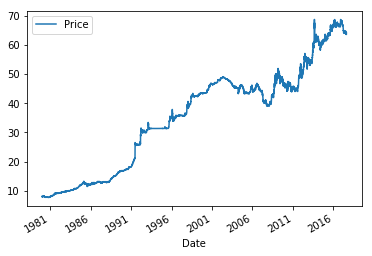

In [32]:
p_dat.plot(x='Date',y='Price')

In [33]:
price_dat = p_dat['Price']

In [34]:
price_dat.head()

9696    8.00
9695    7.95
9694    8.05
9693    8.05
9692    8.05
Name: Price, dtype: float64

In [35]:
print(np.mean(price_dat.values))
print(np.std(price_dat.values))

35.5577077447
17.540190695


### Normalize

In [36]:
price_dat = price_dat.values.ravel().reshape(-1,1)

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
price_dat = scaler.fit_transform(price_dat)

In [38]:
print(np.mean(price_dat))
print(np.std(price_dat))

0.456077018318
0.286956084989


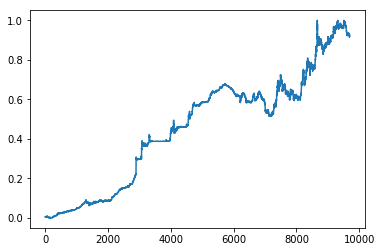

In [39]:
plt.plot(price_dat)

### Train Test Split

In [40]:
ratio = int(round(len(price_dat)*0.8))
print(ratio)

7758


In [41]:
train_dat = price_dat[:ratio]
valid_dat = price_dat[ratio:]

### Creating look back dataset:

In [42]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] # if look_back=1, look back 1 datapoint,  if look_back=2, look back 2 datapoints
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0]) # the next point from the look back points
    return np.array(dataX), np.array(dataY)

In [43]:
# reshape into X=t and Y=t+1
look_back = 1 # using past 1 value to predict the next

trainX, trainY = create_dataset(train_dat, look_back)
testX, testY = create_dataset(valid_dat, look_back)

In [44]:
print(trainX.shape)
print(trainY.shape)

(7756, 1)
(7756,)


In [45]:
trainX[:5,:]

array([[ 0.00523517],
       [ 0.00441718],
       [ 0.00605317],
       [ 0.00605317],
       [ 0.00605317]])

In [46]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [47]:
print(trainX.shape)


(7756, 1, 1)


In [48]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # 4 in here means 4 LSTM blocks or neurons
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 37s - loss: 0.0031
Epoch 2/100
 - 35s - loss: 1.0981e-05
Epoch 3/100
 - 35s - loss: 1.0927e-05
Epoch 4/100
 - 37s - loss: 1.0966e-05
Epoch 5/100
 - 38s - loss: 9.8991e-06
Epoch 6/100
 - 38s - loss: 9.8438e-06
Epoch 7/100
 - 35s - loss: 9.5972e-06
Epoch 8/100
 - 37s - loss: 9.1833e-06
Epoch 9/100
 - 37s - loss: 8.7126e-06
Epoch 10/100
 - 36s - loss: 8.5389e-06
Epoch 11/100
 - 36s - loss: 8.2623e-06
Epoch 12/100
 - 36s - loss: 8.1960e-06
Epoch 13/100
 - 38s - loss: 7.8410e-06
Epoch 14/100
 - 38s - loss: 7.9955e-06
Epoch 15/100
 - 38s - loss: 7.8422e-06
Epoch 16/100
 - 37s - loss: 7.9790e-06
Epoch 17/100
 - 39s - loss: 7.8332e-06
Epoch 18/100
 - 38s - loss: 7.8582e-06
Epoch 19/100
 - 39s - loss: 7.9832e-06
Epoch 20/100
 - 37s - loss: 7.6835e-06
Epoch 21/100
 - 35s - loss: 7.8281e-06
Epoch 22/100
 - 36s - loss: 7.6284e-06
Epoch 23/100
 - 35s - loss: 7.8433e-06
Epoch 24/100
 - 35s - loss: 8.2040e-06
Epoch 25/100
 - 35s - loss: 7.6755e-06
Epoch 26/100
 - 35s - loss: 7.6706e-06

### Predict in-sample and out-sample

In [49]:
res_insp = model.predict(trainX)
res_outsp = model.predict(testX)

In [50]:
# inverse the transformation back to get the true value:
res_insp = scaler.inverse_transform(res_insp)
trainY = scaler.inverse_transform([trainY])

res_outsp = scaler.inverse_transform(res_outsp)
testY = scaler.inverse_transform([testY])

In [51]:
# RMSE:

trainScore = math.sqrt(mean_squared_error(trainY[0], res_insp[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], res_outsp[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.14 RMSE
Test Score: 0.99 RMSE


In [52]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_dat)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(res_insp)+look_back, :] = res_insp
# shift test predictions for plotting
testPredictPlot = np.empty_like(price_dat)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(res_insp)+(look_back*2)+1:len(price_dat)-1, :] = res_outsp
# plot baseline and predictions

#### Original Data:

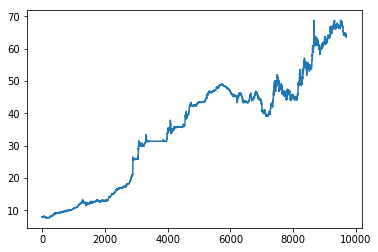

In [53]:

plt.plot(scaler.inverse_transform(price_dat))


#### In-sample Prediction:

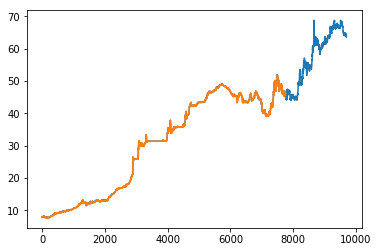

In [54]:
plt.plot(scaler.inverse_transform(price_dat))
plt.plot(trainPredictPlot)


#### Out-sample Prediction:

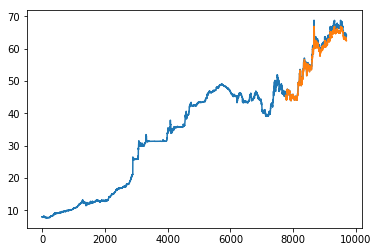

In [55]:
plt.plot(scaler.inverse_transform(price_dat))
plt.plot(testPredictPlot)

# New Method, prediction and keep rolling

In [633]:
dat = pd.read_csv('USD_INR.csv')

In [634]:
# Right order
p_dat = dat[['Date','Price']]
p_dat['Date'] = pd.to_datetime(p_dat['Date'])
p_dat = p_dat.sort_values('Date',ascending=True)
price_dat = p_dat['Price']
print(price_dat.shape)

(9697,)


/Users/y0w0252/my-python/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [635]:
# Price data
price_dat = price_dat.values.ravel().reshape(-1,1)

In [636]:
#Normalize:
scaler = MinMaxScaler(feature_range=(0, 1))
price_dat = scaler.fit_transform(price_dat)


In [637]:
ratio = int(round(len(price_dat)*0.8))

train_dat = price_dat[:ratio]

valid_dat = price_dat[ratio:]

In [638]:
print(len(train_dat))
print(len(valid_dat))

7758
1939


In [639]:
# convert an array of values into a dataset matrix
def create_train(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)] # if look_back=1, look back 1 datapoint,  if look_back=2, look back 2 datapoints
        dataX.append(a)

        dataY.append(dataset[i + look_back]) # the next point from the look back points
    print(len(dataX))
    return np.array(dataX), np.array(dataY)

In [640]:
# reshape into X=t and Y=t+1
look_back = 5 # using past 1 value to predict the next
trainX, trainY = create_train(train_dat, look_back)


7753


In [641]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
print(trainX.shape)
print(trainY.shape)

(7753, 1, 5)
(7753, 1)


In [642]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # 4 in here means 4 LSTM blocks or neurons
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
 - 39s - loss: 0.0039
Epoch 2/20
 - 37s - loss: 1.7448e-05
Epoch 3/20
 - 37s - loss: 1.5626e-05
Epoch 4/20
 - 37s - loss: 1.4954e-05
Epoch 5/20
 - 39s - loss: 1.4936e-05
Epoch 6/20
 - 38s - loss: 1.5143e-05
Epoch 7/20
 - 36s - loss: 1.4407e-05
Epoch 8/20
 - 36s - loss: 1.3773e-05
Epoch 9/20
 - 36s - loss: 1.3995e-05
Epoch 10/20
 - 36s - loss: 1.4296e-05
Epoch 11/20
 - 36s - loss: 1.3215e-05
Epoch 12/20
 - 36s - loss: 1.3476e-05
Epoch 13/20
 - 36s - loss: 1.2884e-05
Epoch 14/20
 - 36s - loss: 1.2886e-05
Epoch 15/20
 - 36s - loss: 1.2411e-05
Epoch 16/20
 - 36s - loss: 1.2420e-05
Epoch 17/20
 - 37s - loss: 1.2397e-05
Epoch 18/20
 - 37s - loss: 1.1946e-05
Epoch 19/20
 - 37s - loss: 1.1849e-05
Epoch 20/20
 - 37s - loss: 1.1702e-05


In [643]:
data=price_dat
ratio=ratio
look_back = look_back
temp_train = data[:ratio]




In [644]:


for i in range(len(data)-len(data[:ratio])):


    testX_temp =  temp_train[(-1-look_back):-1]
    testX_temp = np.reshape(testX_temp, (1, 1, look_back))
    pred = model.predict(testX_temp)
    temp_train = np.append(temp_train,pred).reshape(-1,1)
    print('Predicted: {}'.format(pred))




Predicted: [[ 0.62245858]]
Predicted: [[ 0.62066931]]
Predicted: [[ 0.62068105]]
Predicted: [[ 0.62013465]]
Predicted: [[ 0.62094837]]
Predicted: [[ 0.61954892]]
Predicted: [[ 0.62026483]]
Predicted: [[ 0.61963737]]
Predicted: [[ 0.61969543]]
Predicted: [[ 0.61927152]]
Predicted: [[ 0.61940151]]
Predicted: [[ 0.61893278]]
Predicted: [[ 0.61897135]]
Predicted: [[ 0.61866122]]
Predicted: [[ 0.61858457]]
Predicted: [[ 0.61831999]]
Predicted: [[ 0.61823565]]
Predicted: [[ 0.61798686]]
Predicted: [[ 0.6178723]]
Predicted: [[ 0.61765921]]
Predicted: [[ 0.61752123]]
Predicted: [[ 0.61732191]]
Predicted: [[ 0.61717755]]
Predicted: [[ 0.61698717]]
Predicted: [[ 0.6168347]]
Predicted: [[ 0.6166538]]
Predicted: [[ 0.61649621]]
Predicted: [[ 0.61632019]]
Predicted: [[ 0.61616081]]
Predicted: [[ 0.61598849]]
Predicted: [[ 0.6158275]]
Predicted: [[ 0.61565834]]
Predicted: [[ 0.61549675]]
Predicted: [[ 0.6153298]]
Predicted: [[ 0.61516815]]
Predicted: [[ 0.61500305]]
Predicted: [[ 0.61484158]]
Predic

Predicted: [[ 0.58187521]]
Predicted: [[ 0.58178192]]
Predicted: [[ 0.5816887]]
Predicted: [[ 0.58159578]]
Predicted: [[ 0.5815028]]
Predicted: [[ 0.58141005]]
Predicted: [[ 0.58131731]]
Predicted: [[ 0.5812248]]
Predicted: [[ 0.58113229]]
Predicted: [[ 0.58103997]]
Predicted: [[ 0.58094776]]
Predicted: [[ 0.58085567]]
Predicted: [[ 0.58076364]]
Predicted: [[ 0.58067179]]
Predicted: [[ 0.58058017]]
Predicted: [[ 0.58048838]]
Predicted: [[ 0.58039695]]
Predicted: [[ 0.58030552]]
Predicted: [[ 0.58021426]]
Predicted: [[ 0.58012307]]
Predicted: [[ 0.58003205]]
Predicted: [[ 0.57994103]]
Predicted: [[ 0.57985026]]
Predicted: [[ 0.57975948]]
Predicted: [[ 0.57966894]]
Predicted: [[ 0.57957834]]
Predicted: [[ 0.57948798]]
Predicted: [[ 0.57939768]]
Predicted: [[ 0.57930744]]
Predicted: [[ 0.57921737]]
Predicted: [[ 0.57912743]]
Predicted: [[ 0.57903749]]
Predicted: [[ 0.57894778]]
Predicted: [[ 0.57885808]]
Predicted: [[ 0.57876855]]
Predicted: [[ 0.57867908]]
Predicted: [[ 0.57858968]]
Pred

Predicted: [[ 0.54683387]]
Predicted: [[ 0.54676056]]
Predicted: [[ 0.54668742]]
Predicted: [[ 0.54661411]]
Predicted: [[ 0.54654086]]
Predicted: [[ 0.5464676]]
Predicted: [[ 0.54639441]]
Predicted: [[ 0.54632103]]
Predicted: [[ 0.54624772]]
Predicted: [[ 0.54617447]]
Predicted: [[ 0.54610115]]
Predicted: [[ 0.54602784]]
Predicted: [[ 0.54595453]]
Predicted: [[ 0.54588121]]
Predicted: [[ 0.54580784]]
Predicted: [[ 0.54573447]]
Predicted: [[ 0.54566103]]
Predicted: [[ 0.54558778]]
Predicted: [[ 0.54551435]]
Predicted: [[ 0.54544097]]
Predicted: [[ 0.5453676]]
Predicted: [[ 0.54529411]]
Predicted: [[ 0.54522073]]
Predicted: [[ 0.5451473]]
Predicted: [[ 0.54507387]]
Predicted: [[ 0.54500043]]
Predicted: [[ 0.54492694]]
Predicted: [[ 0.54485345]]
Predicted: [[ 0.54477996]]
Predicted: [[ 0.5447064]]
Predicted: [[ 0.54463297]]
Predicted: [[ 0.5445593]]
Predicted: [[ 0.54448587]]
Predicted: [[ 0.5444122]]
Predicted: [[ 0.5443387]]
Predicted: [[ 0.54426503]]
Predicted: [[ 0.54419148]]
Predicte

Predicted: [[ 0.51138431]]
Predicted: [[ 0.51128799]]
Predicted: [[ 0.51119161]]
Predicted: [[ 0.51109517]]
Predicted: [[ 0.51099849]]
Predicted: [[ 0.51090187]]
Predicted: [[ 0.51080507]]
Predicted: [[ 0.51070809]]
Predicted: [[ 0.51061118]]
Predicted: [[ 0.5105139]]
Predicted: [[ 0.51041675]]
Predicted: [[ 0.51031941]]
Predicted: [[ 0.5102219]]
Predicted: [[ 0.51012427]]
Predicted: [[ 0.51002663]]
Predicted: [[ 0.50992876]]
Predicted: [[ 0.50983089]]
Predicted: [[ 0.50973278]]
Predicted: [[ 0.50963467]]
Predicted: [[ 0.50953639]]
Predicted: [[ 0.50943804]]
Predicted: [[ 0.50933951]]
Predicted: [[ 0.50924087]]
Predicted: [[ 0.5091421]]
Predicted: [[ 0.50904334]]
Predicted: [[ 0.50894427]]
Predicted: [[ 0.50884527]]
Predicted: [[ 0.50874609]]
Predicted: [[ 0.50864667]]
Predicted: [[ 0.50854725]]
Predicted: [[ 0.50844777]]
Predicted: [[ 0.50834799]]
Predicted: [[ 0.50824827]]
Predicted: [[ 0.50814831]]
Predicted: [[ 0.5080483]]
Predicted: [[ 0.50794816]]
Predicted: [[ 0.50784785]]
Predi

Predicted: [[ 0.45614412]]
Predicted: [[ 0.45596009]]
Predicted: [[ 0.45577574]]
Predicted: [[ 0.45559102]]
Predicted: [[ 0.45540598]]
Predicted: [[ 0.45522058]]
Predicted: [[ 0.45503482]]
Predicted: [[ 0.45484877]]
Predicted: [[ 0.45466232]]
Predicted: [[ 0.45447552]]
Predicted: [[ 0.45428836]]
Predicted: [[ 0.45410097]]
Predicted: [[ 0.45391303]]
Predicted: [[ 0.45372489]]
Predicted: [[ 0.4535363]]
Predicted: [[ 0.45334744]]
Predicted: [[ 0.45315811]]
Predicted: [[ 0.4529686]]
Predicted: [[ 0.45277861]]
Predicted: [[ 0.45258826]]
Predicted: [[ 0.45239758]]
Predicted: [[ 0.45220661]]
Predicted: [[ 0.45201513]]
Predicted: [[ 0.45182344]]
Predicted: [[ 0.45163125]]
Predicted: [[ 0.45143881]]
Predicted: [[ 0.45124596]]
Predicted: [[ 0.45105278]]
Predicted: [[ 0.45085916]]
Predicted: [[ 0.45066532]]
Predicted: [[ 0.45047092]]
Predicted: [[ 0.45027637]]
Predicted: [[ 0.45008126]]
Predicted: [[ 0.4498859]]
Predicted: [[ 0.44969016]]
Predicted: [[ 0.449494]]
Predicted: [[ 0.44929749]]
Predic

In [600]:
# res = sequence_predict(data=price_dat,model=model,ratio=ratio,look_back = look_back)

In [645]:
temp_train.shape

(9697, 1)

In [646]:
len(price_dat)

9697

In [464]:


# for i in range(price_dat.shape[0]-trainX.shape[0]-1):
    
    
#     testX_temp =  temp_train[(-1-look_back):-1]
#     testX_temp = np.reshape(testX_temp, (testX_temp.shape[0], 1, testX_temp.shape[1]))
#     pred = model.predict(testX_temp)
#     temp_train = np.append(temp_train,pred).reshape(-1,1)
#     print('trained on: %.3f , predicted: %.3f'%(temp_train[(-1-look_back):-1],pred))

In [465]:
# print(temp_train.shape)
# print(price_dat.shape)

In [647]:
# inverse the transformation back to get the true value:
temp_train = scaler.inverse_transform(temp_train)
price_dat = scaler.inverse_transform(price_dat)



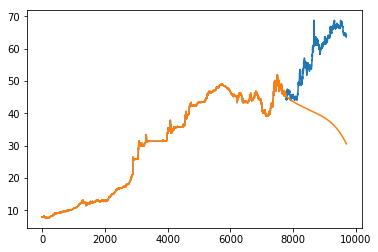

In [649]:
plt.plot(price_dat)
plt.plot(temp_train)

In [612]:
# RMSE:

def rmse(x,y):
    
    
    return np.sqrt(np.mean(np.power(x-y,2)))

In [613]:
temp_train[ratio:].shape

(1939, 1)

In [614]:
#11.57 when 20 epochs
rmse(price_dat[ratio:],temp_train[ratio:])

0.2799947318237988